In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from pipe import select, where, sort
from sklearn.preprocessing import LabelEncoder

import presentation as p

with open('data/network-traffic/kddcup.names.dat') as file:
    col_re = r'(\w+)\:.*'
    cols = [re.search(col_re, line)[1] for line in file.readlines()[1:]] + ['target']

training_df = pd.read_csv('data/network-traffic/kddcup.data.csv', names=cols, index_col=False, header=None)
testing_df = pd.read_csv('data/network-traffic/corrected.csv', names=cols, index_col=False, header=None)
complete_df = pd.concat([training_df, testing_df], axis=0)

# Grouping of Attack Types
attack_group_mapping_ = {
    'neptune': 'dos',
    'satan': 'probe',
    'smurf': 'dos',
    'ipsweep': 'probe',
    'portsweep': 'probe',
    'nmap': 'probe',
    'guess_passwd': 'r2l',
    'back': 'dos',
    'mscan': 'probe',
    'warezmaster': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'apache2': 'dos',
    'processtable': 'dos',
    'saint': 'probe',
    'snmpguess': 'probe',
    'mailbomb': 'dos',
    'pod': 'dos',
    'snmpgetattack': 'dos',
    'httptunnel': 'r2l',
    'buffer_overflow': 'u2r',
    'land': 'dos',
    'multihop': 'r2l',
    'rootkit': 'u2r',
    'named': 'r2l',
    'ps': 'u2r',
    'sendmail': 'r2l',
    'imap': 'r2l',
    'xterm': 'r2l',
    'loadmodule': 'u2r',
    'ftp_write': 'r2l',
    'xlock': 'r2l',
    'phf': 'r2l',
    'perl': 'u2r',
    'xsnoop': 'r2l',
    'udpstorm': 'dos',
    'spy': 'r2l',
    'worm': 'r2l',
    'sqlattack': 'u2r'
}
def is_attack(target):
    match target:
        case 'normal':
            return False
        case _:
            return True
def group_attack_type(a_type): return attack_group_mapping_[a_type] if is_attack(a_type) else a_type

complete_df['target_group'] = complete_df.target.map(group_attack_type)
training_df['target_group'] = training_df.target.map(group_attack_type)
testing_df['target_group'] = testing_df.target.map(group_attack_type)
complete_df['is_attack'] = complete_df.target.map(is_attack)
training_df['is_attack'] = training_df.target.map(is_attack)
testing_df['is_attack'] = testing_df.target.map(is_attack)

# Columns with 'object' type
object_column_names = [complete_df[col].name for col in complete_df.columns if complete_df[col].dtype == 'object']

label_encoder = LabelEncoder()
complete_df_enc_le = complete_df.copy()
training_df_enc_le = training_df.copy()
testing_df_enc_le = testing_df.copy()
for column in object_column_names:
    complete_df_enc_le[column] = label_encoder.fit_transform(complete_df[column])
    training_df_enc_le[column] = label_encoder.transform(training_df[column])
    testing_df_enc_le[column] = label_encoder.transform(testing_df[column])

training_df_clean = training_df.drop_duplicates()
training_df_enc_le_clean = training_df_enc_le.drop_duplicates()
testing_df_clean = testing_df.drop_duplicates()
testing_df_enc_le_clean = testing_df_enc_le.drop_duplicates()
complete_df_clean = complete_df.drop_duplicates()
complete_df_enc_le_clean = complete_df_enc_le.drop_duplicates()

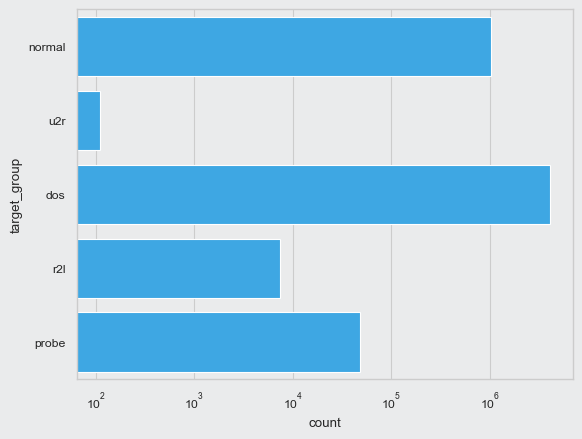

In [2]:
sns.countplot(complete_df.target_group)
plt.xscale('log')
plt.show()

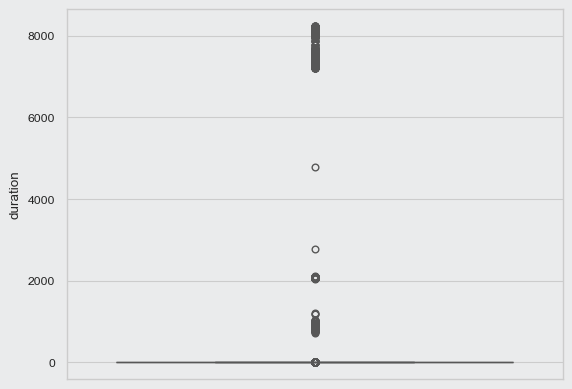

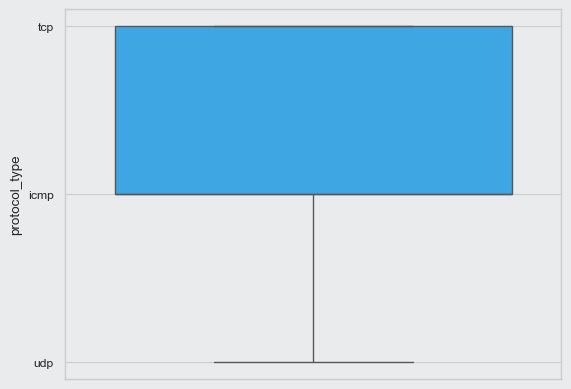

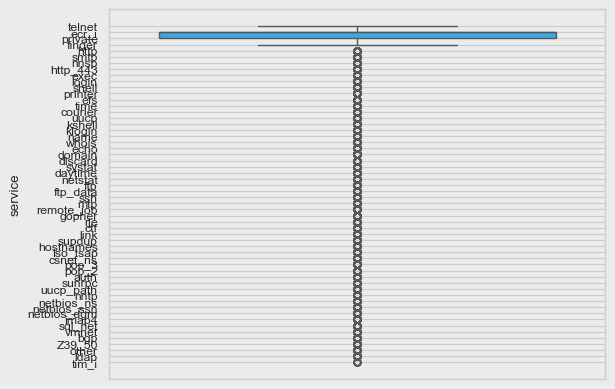

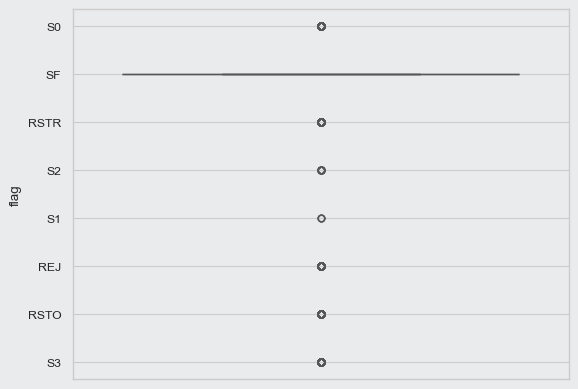

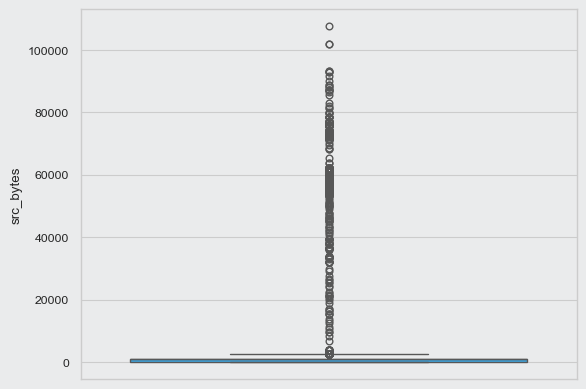

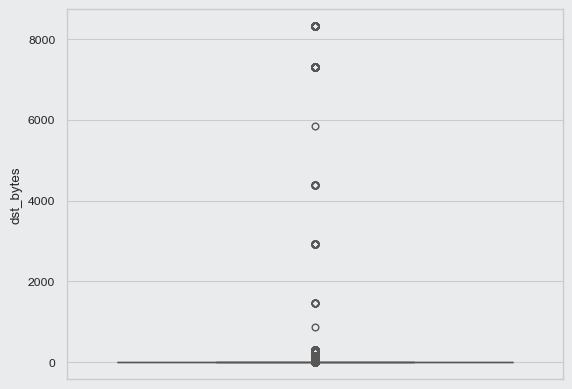

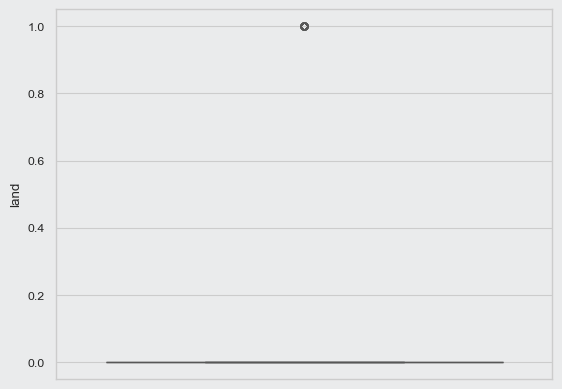

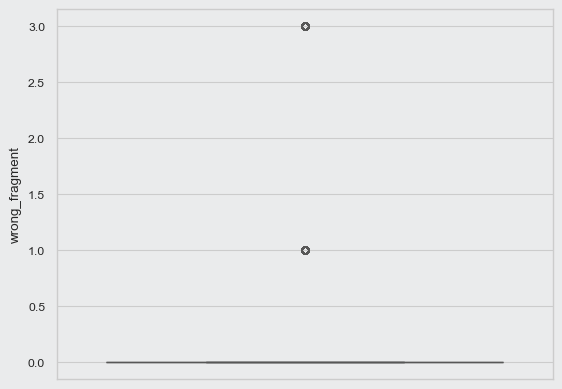

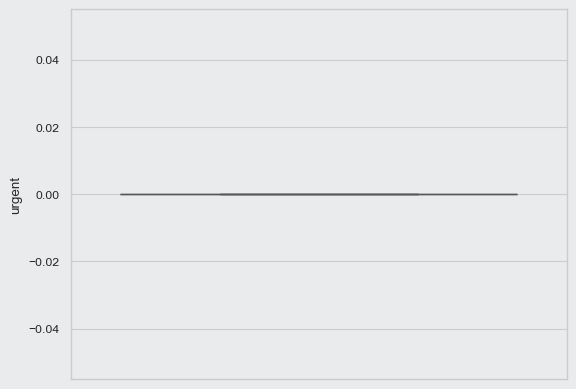

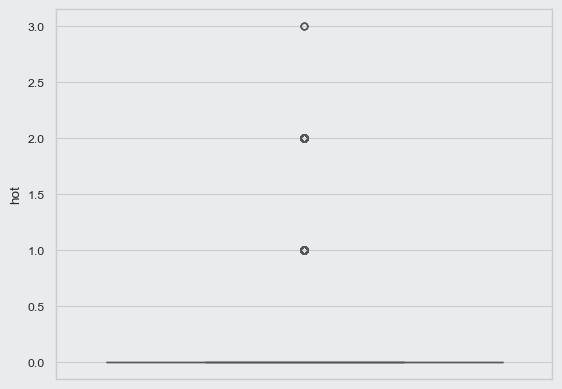

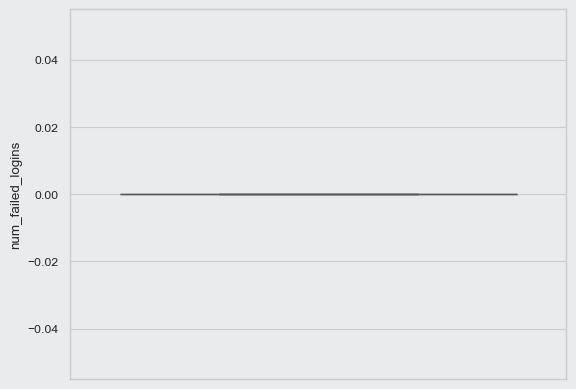

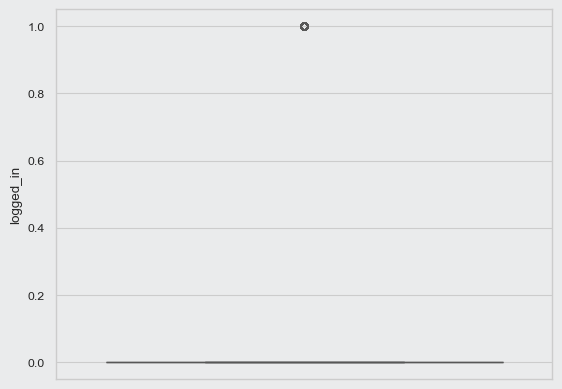

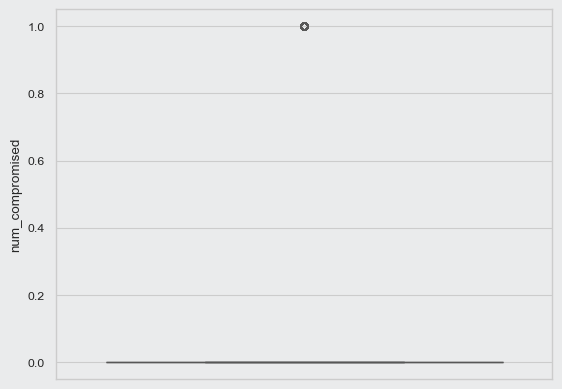

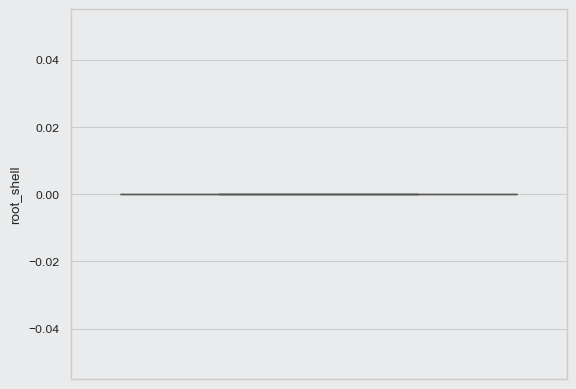

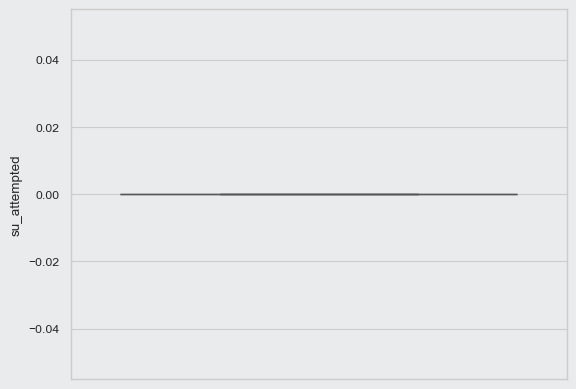

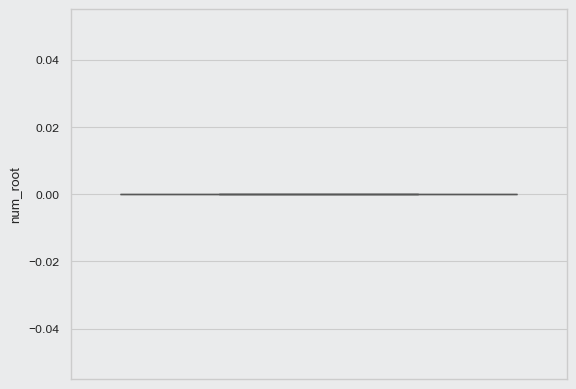

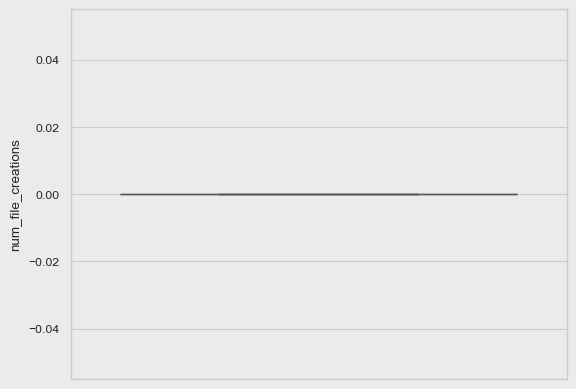

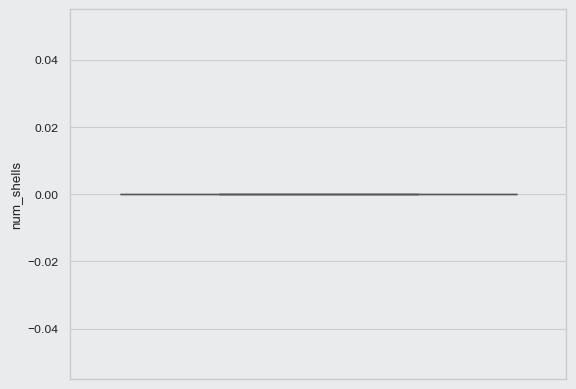

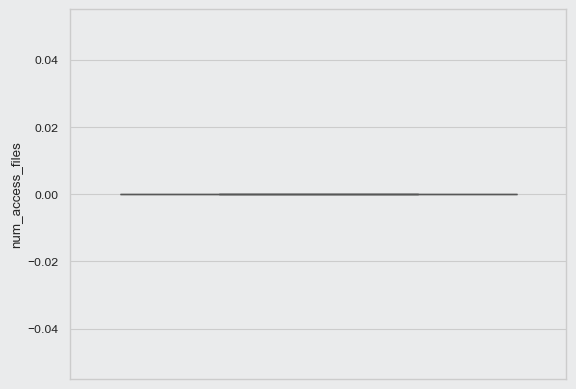

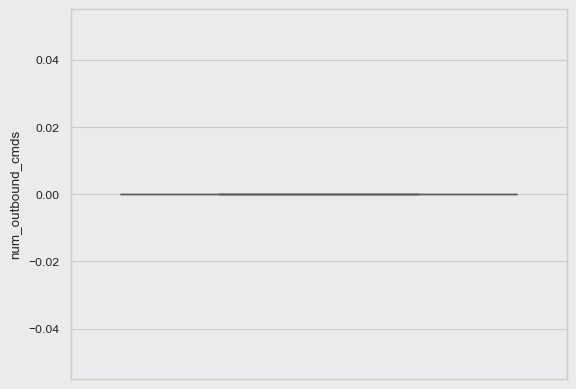

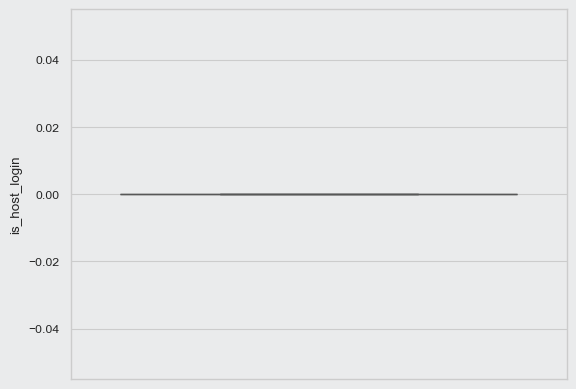

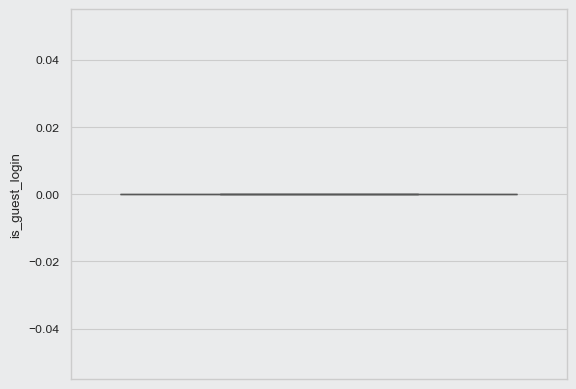

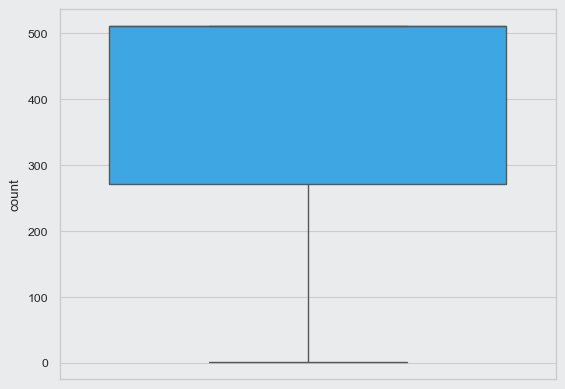

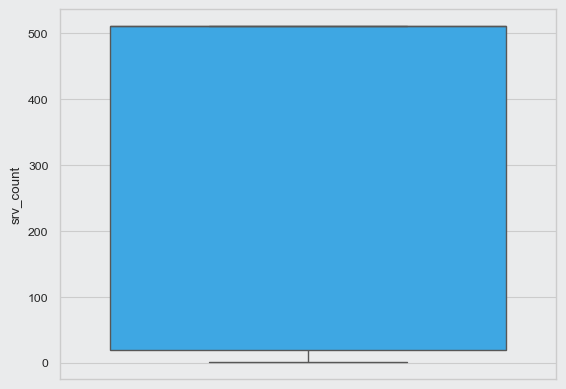

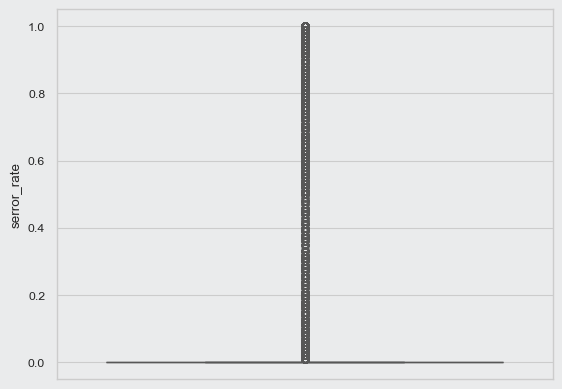

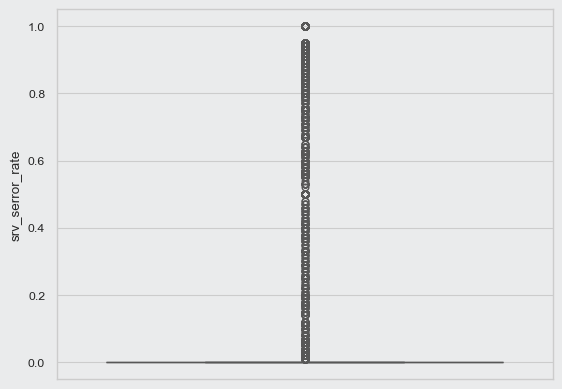

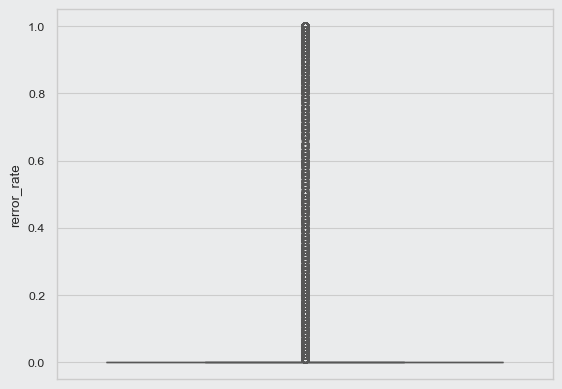

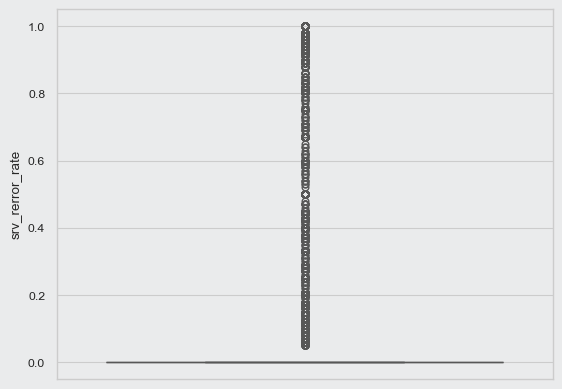

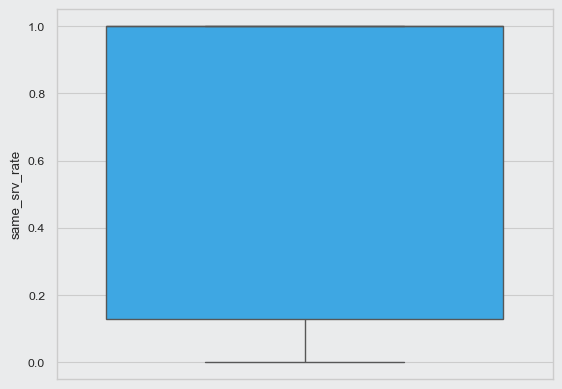

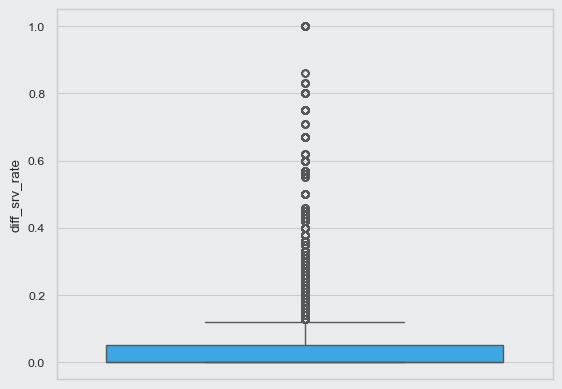

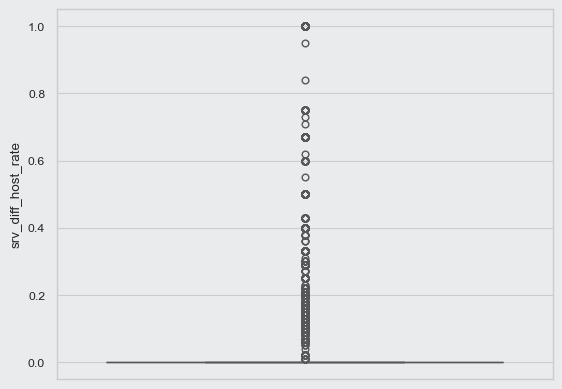

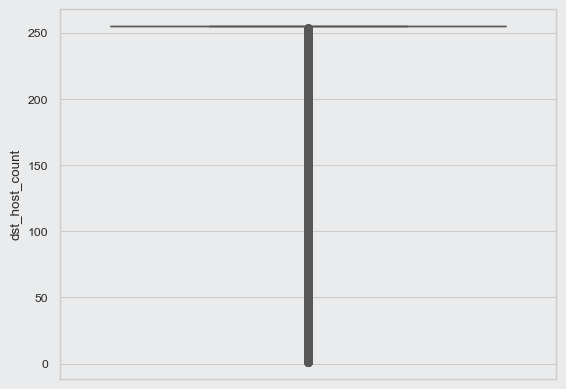

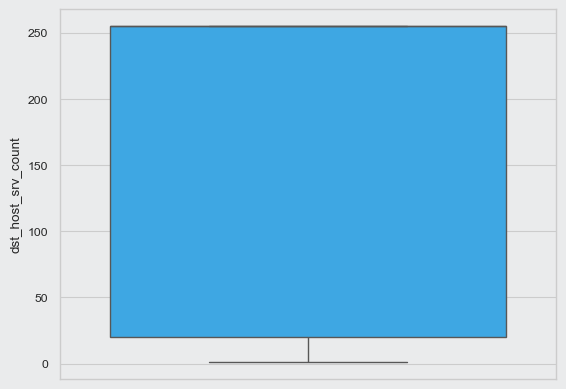

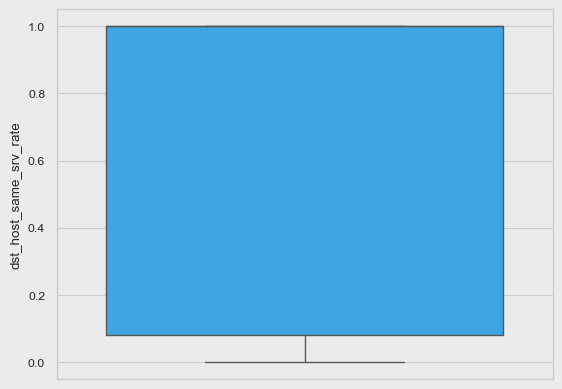

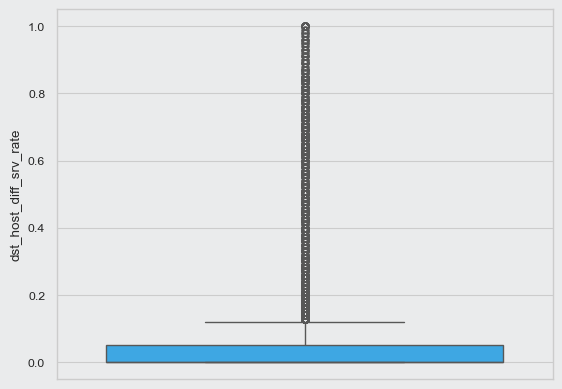

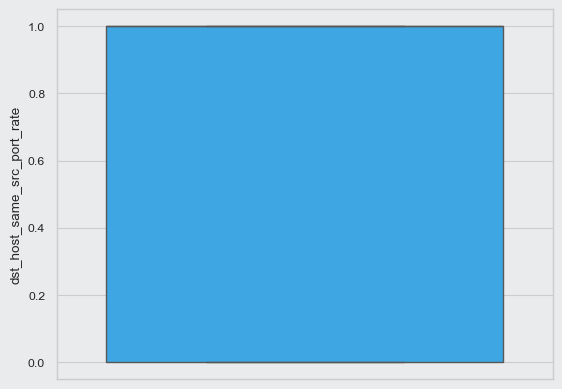

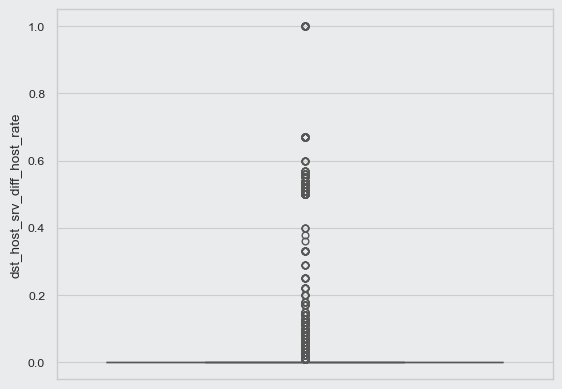

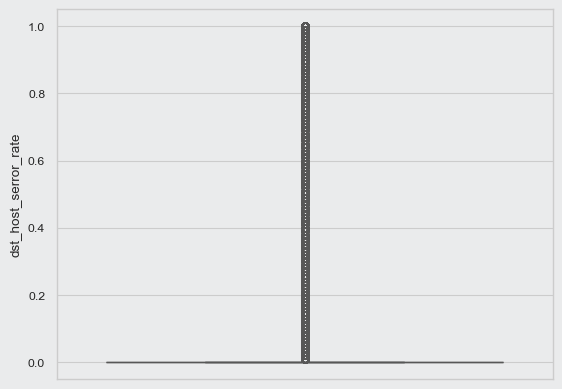

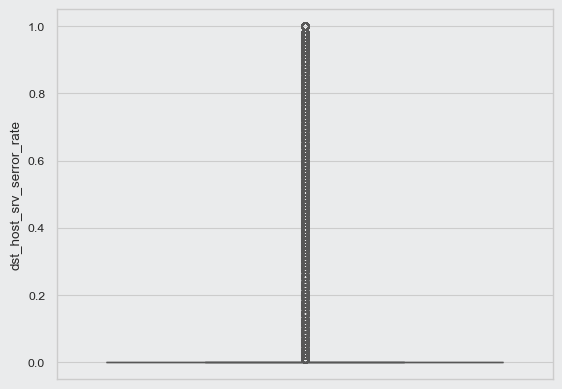

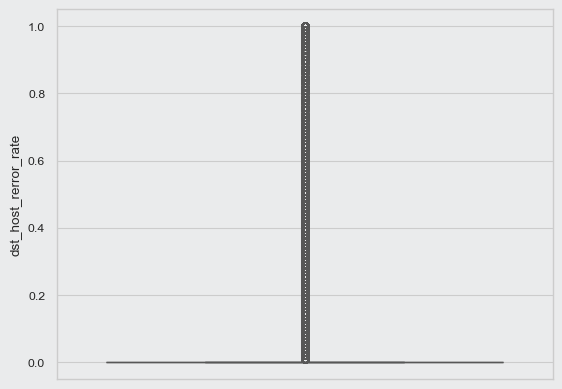

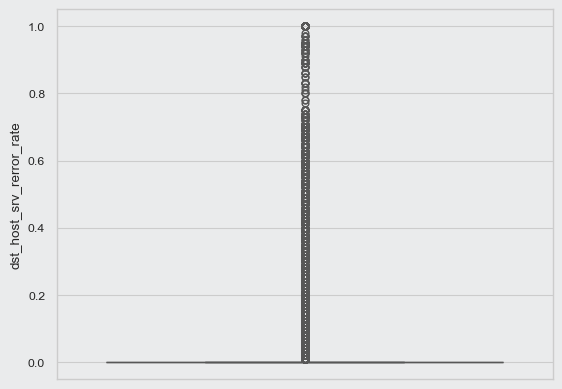

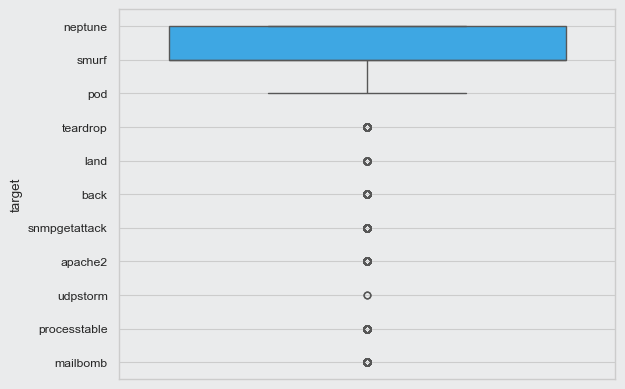

In [31]:
dos_df = complete_df[complete_df.target_group=='dos']

for column in dos_df.columns[:-2]:
    sns.boxplot(dos_df[column])
    plt.show()

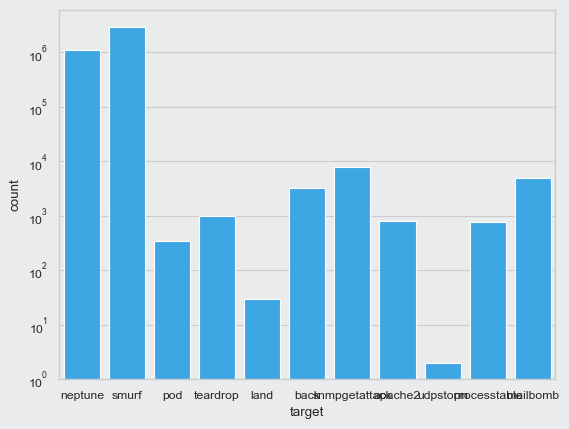

In [23]:
sns.countplot(dos_df, x='target')
plt.yscale('log')
plt.show()

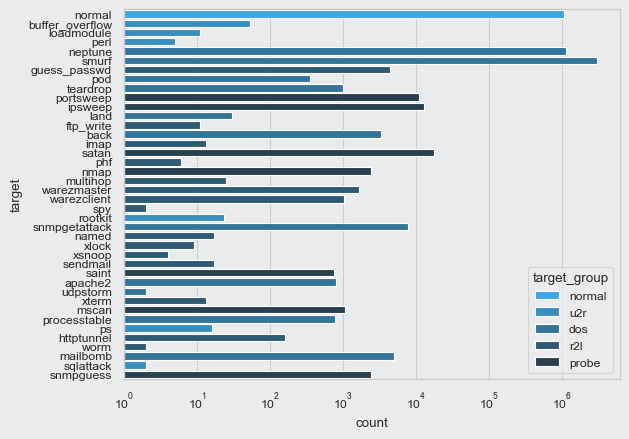

In [27]:
sns.countplot(complete_df, y='target', hue='target_group')
plt.xscale('log')
plt.show()

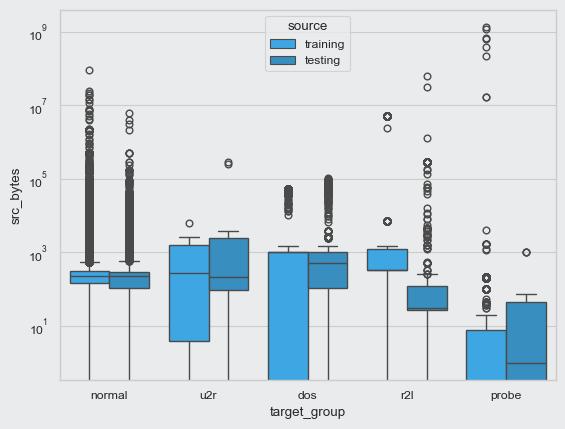

In [2]:
training_df_ = training_df.copy()
training_df_['source'] = 'training'

testing_df_ = testing_df.copy()
testing_df_['source'] = 'testing'

combined_ = pd.concat([training_df_, testing_df_])

sns.boxplot(combined_, y='src_bytes', x='target_group', hue='source')
plt.yscale('log')
plt.show()

In [31]:
sns.countplot?

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

In [35]:
training_df.shape

(4898431, 44)

In [36]:
testing_df.shape

(311029, 44)

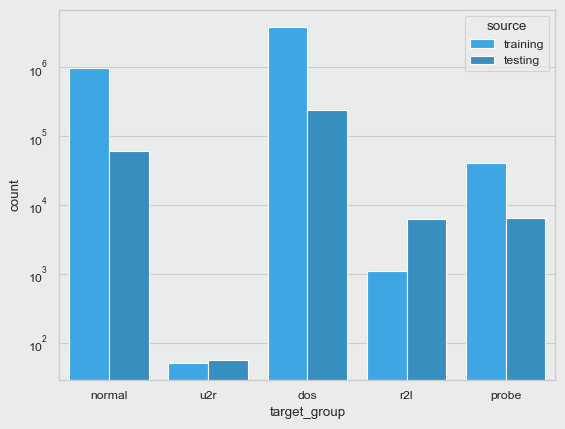

In [34]:
sns.countplot(combined_[['source', 'target_group']], x='target_group', hue='source')#, stat='percent')
plt.yscale('log')
plt.show()

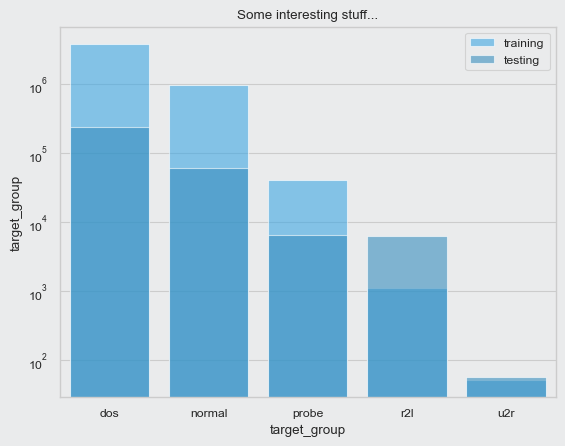

In [20]:
sns.barplot(bar_data['training'], label='training')
sns.barplot(bar_data['testing'], label='testing')
plt.yscale('log')
plt.legend()
plt.title('Some interesting stuff...')
plt.show()

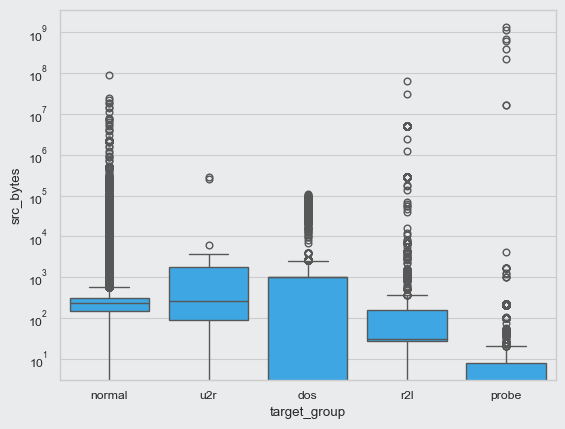

In [26]:
sns.boxplot(complete_df, y='src_bytes', x='target_group')
plt.yscale('log')
plt.show()

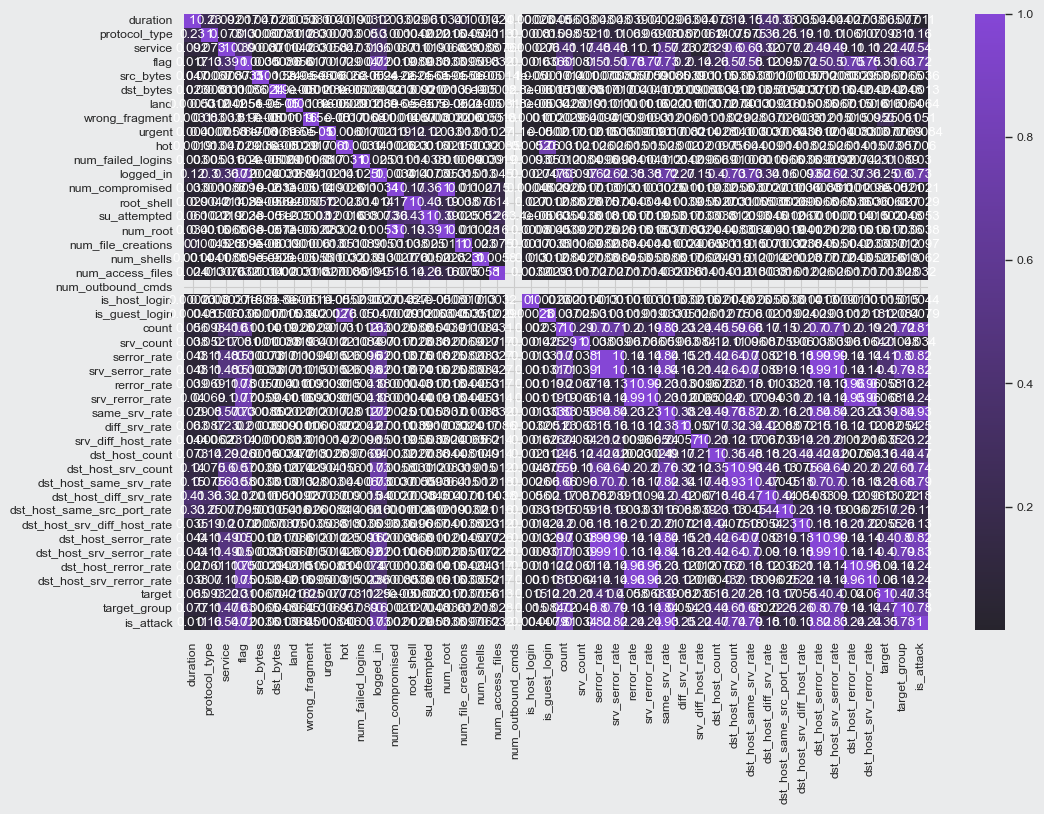

In [36]:
plt.figure(figsize=(12,8))
heatmap_data = abs(complete_df_enc_le_clean.corr())
sns.heatmap(heatmap_data, annot=True, cmap=p.Colors.purples_c)
plt.show()

In [48]:
def has_significant_correlation(threshold, row_or_column):
    return len(row_or_column[(row_or_column >= threshold)]) > 1

In [51]:
significant_heatmap_data = heatmap_data.copy()
for column in significant_heatmap_data.columns:
    if not has_significant_correlation(.8, significant_heatmap_data[column]):
        significant_heatmap_data.drop(column, axis=0, inplace=True)
        significant_heatmap_data.drop(column, axis=1, inplace=True)

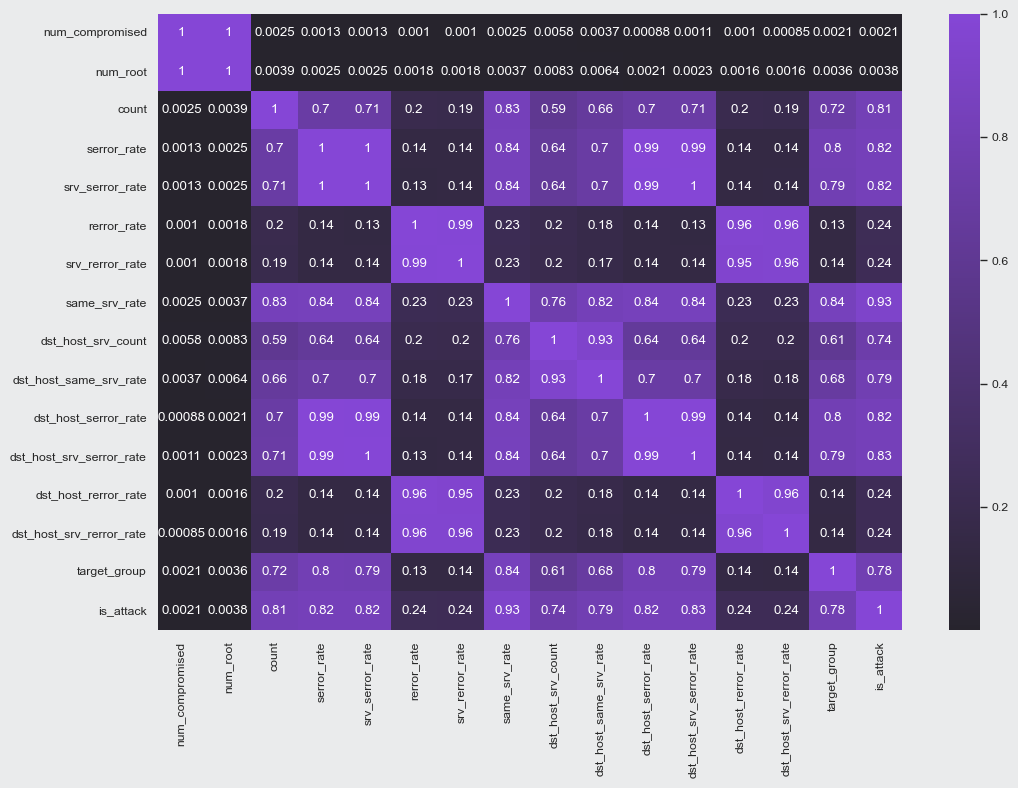

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(significant_heatmap_data, annot=True, cmap=p.Colors.purples_c)
plt.show()